In [1]:
import os
import os.path as op
import sys
import numpy as np

import matplotlib.pyplot as plt

factory_dir = r"C:/Users/Alan/Documents/hybridfactory/"
if not factory_dir in sys.path:
    sys.path.insert(0, factory_dir)
    
import factory.io.phy
import factory.io.jrc
import factory.io.raw

C:\Users\Alan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
%matplotlib notebook

In [3]:
easy1 = r"F:/Spike sorting/2017-10-25-easy1"
spikegl = op.join(easy1, "SpikeGL")
arseny = op.join(easy1, "arseny")

arseny_times = factory.io.jrc.load_event_times(arseny)
arseny_source = factory.io.raw.open_raw(op.join(spikegl, "anm365938_g0_t0.nidq.bin"), np.int16, 256)

In [4]:
import factory.probes.hh2_arseny as hh2_arseny
arseny_windows = factory.io.raw.unit_windows(arseny_source, arseny_times[arseny_times < arseny_source.shape[1] - 50],
                                             samples_before=4, samples_after=30)

arseny_windows_car = factory.io.raw.unit_windows(arseny_source,
                                                 arseny_times[arseny_times < arseny_source.shape[1] - 50],
                                                 samples_before=4, samples_after=30,
                                                 car_channels=np.where(hh2_arseny.connected)[0])

<IPython.core.display.Javascript object>


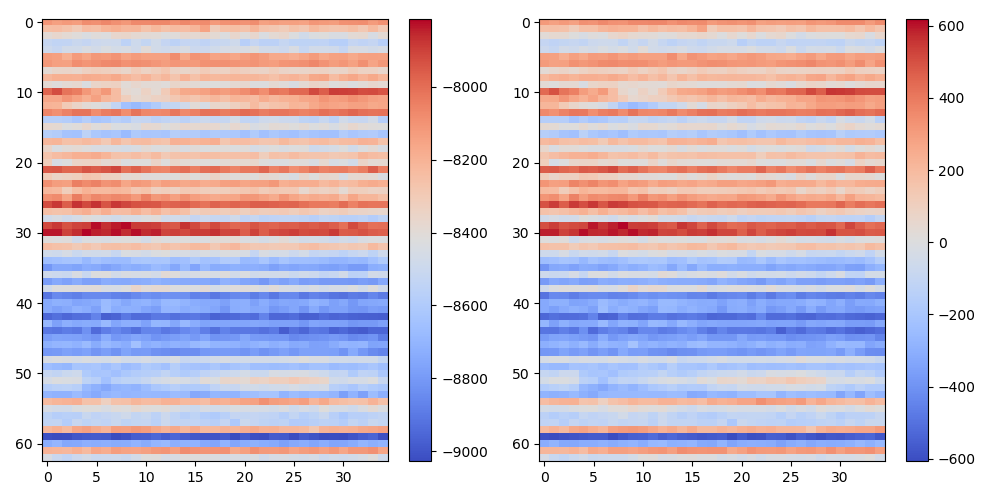

In [5]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(arseny_windows[hh2_arseny.connected,:,2], "coolwarm", aspect="auto", interpolation="nearest")
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(arseny_windows_car[hh2_arseny.connected,:,2], "coolwarm", aspect="auto", interpolation="nearest")
plt.colorbar()

plt.tight_layout()

In [6]:
del arseny_source

## eMouse

In [7]:
eMouse_dir = r"C:/Users/Alan/Documents/Data/eMouse"

eMouse_times = factory.io.phy.load_event_times(eMouse_dir)
eMouse_clusters = factory.io.phy.load_event_clusters(eMouse_dir)
eMouse_source = factory.io.raw.open_raw(op.join(eMouse_dir, "sim_binary.dat"), np.int16, 34)

In [8]:
import factory.probes.eMouse as eMouse
eMouse_windows = factory.io.raw.unit_windows(eMouse_source, eMouse_times[eMouse_clusters==6],
                                             samples_before=30, samples_after=30)
eMouse_windows_car = factory.io.raw.unit_windows(eMouse_source, eMouse_times[eMouse_clusters==6],
                                                 samples_before=30, samples_after=30,
                                                 car_channels=np.where(eMouse.connected)[0])

<IPython.core.display.Javascript object>


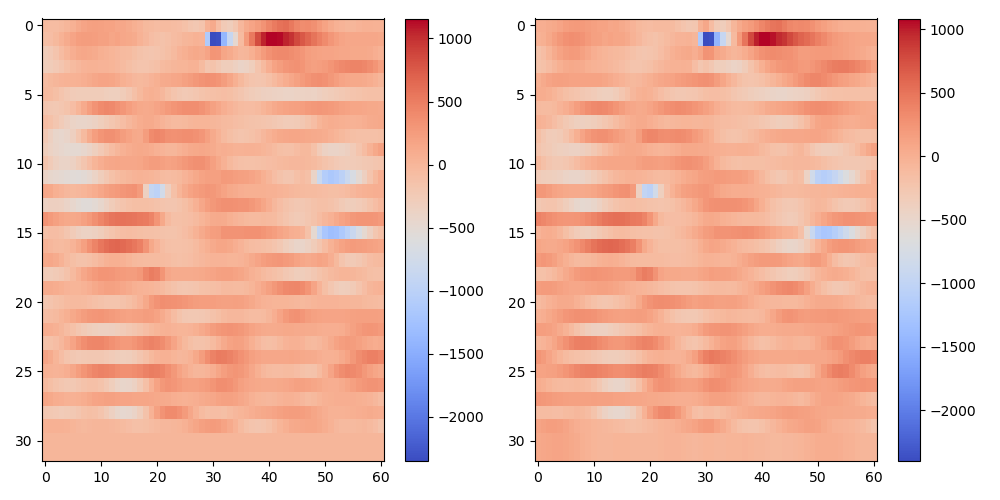

In [9]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(eMouse_windows[eMouse.connected,:,2], "coolwarm", aspect="auto", interpolation="nearest")
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(eMouse_windows_car[eMouse.connected,:,2], "coolwarm", aspect="auto", interpolation="nearest")
plt.colorbar()

plt.tight_layout()